<h1>Spotify 2023 Top Songs Analysis</h1>

<h2>Query Relevant Columns From Raw Dataset</h2>

<div class="alert alert-block alert-info">These queries were used in MySQL and moved to this notebook for demonstration purposes</div>

In [ ]:
-- See how many top songs are from which year 
SELECT DISTINCT released_year, COUNT(released_year)
FROM `spotify`.`spotify-2023`
GROUP BY released_year
ORDER BY released_year DESC;

-- Select relevant columns for analysis
SELECT `track_name`, `artist(s)_name`, `artist_count`, `released_year`, `streams`, `in_spotify_playlists`, `in_apple_playlists`, `in_deezer_playlists`, `bpm`, `key`, `mode`
FROM `spotify`.`spotify-2023`;

<h2>Import Queried Dataset</h2>

In [23]:
import pandas as pd

In [29]:
df = pd.read_csv(r"C:\Users\justi\Downloads\spotify_2023_queried.csv") #replace with file path name
df

,track_name,artist(s)_name,artist_count,released_year,streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,bpm,key,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,141381703,553,43,45,125,B,Major
1,LALA,Myke Towers,1,2023,133716286,1474,48,58,92,C#,Major
2,vampire,Olivia Rodrigo,1,2023,140003974,1397,94,91,138,F,Major
3,Cruel Summer,Taylor Swift,1,2019,800840817,7858,116,125,170,A,Major
4,WHERE SHE GOES,Bad Bunny,1,2023,303236322,3133,84,87,144,A,Minor
...,...,...,...,...,...,...,...,...,...,...,...
821,My Mind & Me,Selena Gomez,1,2022,91473363,953,61,37,144,A,Major
822,Bigger Than The Whole Sky,Taylor Swift,1,2022,121871870,1180,4,8,166,F#,Major
823,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,73513683,573,2,7,92,C#,Major
824,En La De Ella,"Feid, Sech, Jhayco",3,2022,133895612,1320,29,17,97,C#,Major


<h2>Music Analysis</h2>

<h3>Explore patterns in audio features to understand trends and preferences in popular songs</h3>

In [31]:
import matplotlib.pyplot as plt

In [33]:
audio_features_summary = df[['bpm', 'key', 'mode']].describe()
print(audio_features_summary)

most_common_bpm = df['bpm'].mode()[0]
most_common_key = df['key'].mode()[0]
most_common_mode = df['mode'].mode()[0]
print(f"Most common BPM: {most_common_bpm}")
print(f"Most common key: {most_common_key}")
print(f"Most common mode: {most_common_mode}")

mode_distribution = df['mode'].value_counts()
print("Mode distribution:")
print(mode_distribution)

key_distribution = df['key'].value_counts()
print("Key distribution:")
print(key_distribution)

              bpm
count  826.000000
mean   122.990315
std     27.915933
min     65.000000
25%    100.000000
50%    121.000000
75%    141.750000
max    206.000000
Most common BPM: 120
Most common key: C#
Most common mode: Major
Mode distribution:
mode
Major    471
Minor    355
Name: count, dtype: int64
Key distribution:
key
C#    102
G      83
F      81
G#     79
B      71
D      68
A      66
F#     63
E      53
A#     52
D#     27
Name: count, dtype: int64


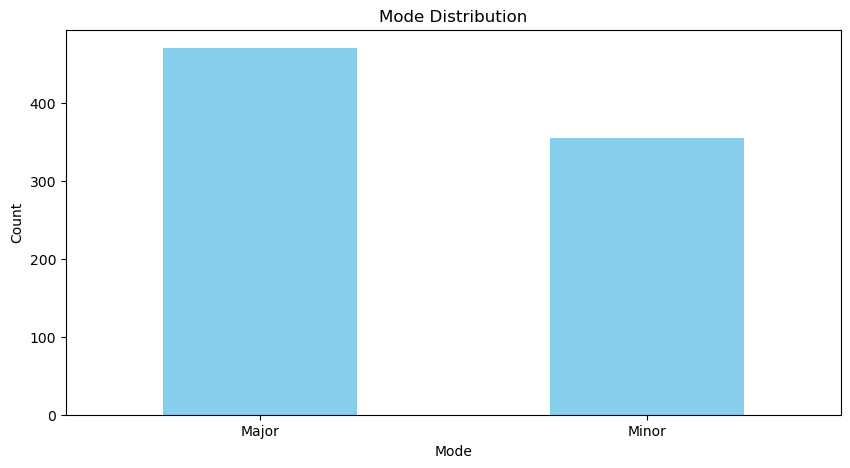

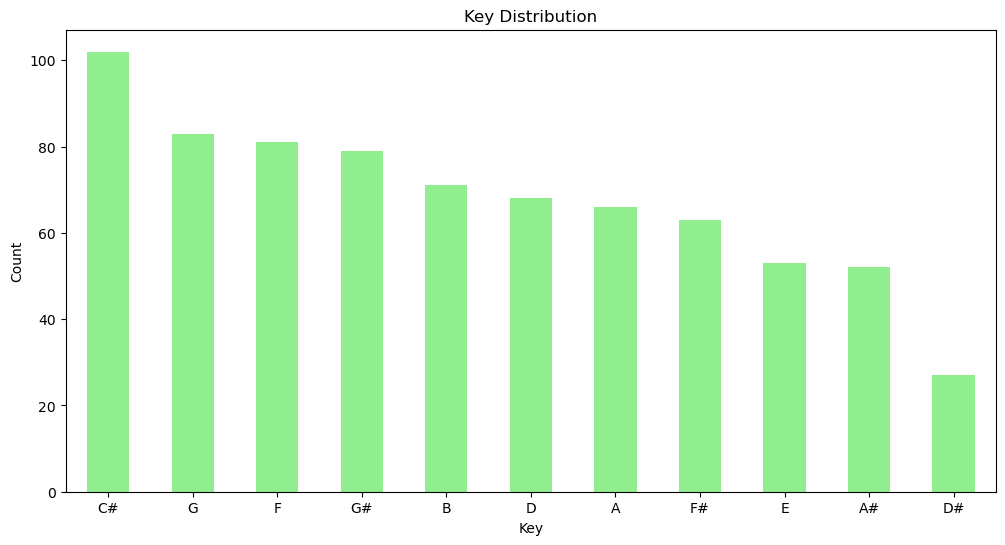

In [35]:
# Plotting mode distribution
plt.figure(figsize=(10, 5))
mode_distribution.plot(kind='bar', color='skyblue')
plt.title('Mode Distribution')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.show()

# Plotting key distribution
plt.figure(figsize=(12, 6))
key_distribution.plot(kind='bar', color='lightgreen')
plt.title('Key Distribution')
plt.xlabel('Key')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.show()

<h2>Platform Comparison</h2>

<h3>Compare the song's popularity across different music platforms</h3>

In [38]:
# Average number of playlists across platforms
avg_spotify_playlists = df['in_spotify_playlists'].mean()
avg_apple_playlists = df['in_apple_playlists'].mean()
avg_deezer_playlists = df['in_deezer_playlists'].mean()

print(f"Average Spotify playlists: {avg_spotify_playlists}")
print(f"Average Apple playlists: {avg_apple_playlists}")
print(f"Average Deezer playlists: {avg_deezer_playlists}")

# Correlation between streams and playlists on each platform
correlation_spotify = df['streams'].corr(df['in_spotify_playlists'])
correlation_apple = df['streams'].corr(df['in_apple_playlists'])
correlation_deezer = df['streams'].corr(df['in_deezer_playlists'])

print(f"Correlation between streams and Spotify playlists: {correlation_spotify}")
print(f"Correlation between streams and Apple playlists: {correlation_apple}")
print(f"Correlation between streams and Deezer playlists: {correlation_deezer}")

Average Spotify playlists: 3059.8317191283295
Average Apple playlists: 48.592009685230025
Average Deezer playlists: 94.25060532687651
Correlation between streams and Spotify playlists: 0.7477726810553583
Correlation between streams and Apple playlists: 0.6244730259854405
Correlation between streams and Deezer playlists: 0.694305755754302


<h2>Artist Impact</h2>

<h3>Analyze how artist involvement and attributes relate to a song's success</h3>

In [42]:
# Average streams by artist count
avg_streams_by_artist_count = df.groupby('artist_count')['streams'].mean()
print("Average streams by artist count:")
print(avg_streams_by_artist_count)

# Top 10 artists by total streams
top_artists_by_streams = df.groupby('artist(s)_name')['streams'].sum().nlargest(10)
print("Top 10 artists by total streams:")
print(top_artists_by_streams)

Average streams by artist count:
artist_count
1    3.948046e+08
2    3.407826e+08
3    2.955419e+08
4    3.061062e+08
5    1.448082e+08
6    8.746645e+07
7    2.454002e+08
8    1.732212e+08
Name: streams, dtype: float64
Top 10 artists by total streams:
artist(s)_name
Taylor Swift      12939819427
Bad Bunny          9997799607
The Weeknd         7867833376
Harry Styles       6772877034
SZA                4557811204
Bruno Mars         4205493931
Olivia Rodrigo     3696965124
BTS                2696993599
Mï¿½ï¿½ne          2675632206
Arctic Monkeys     2514146936
Name: streams, dtype: int64


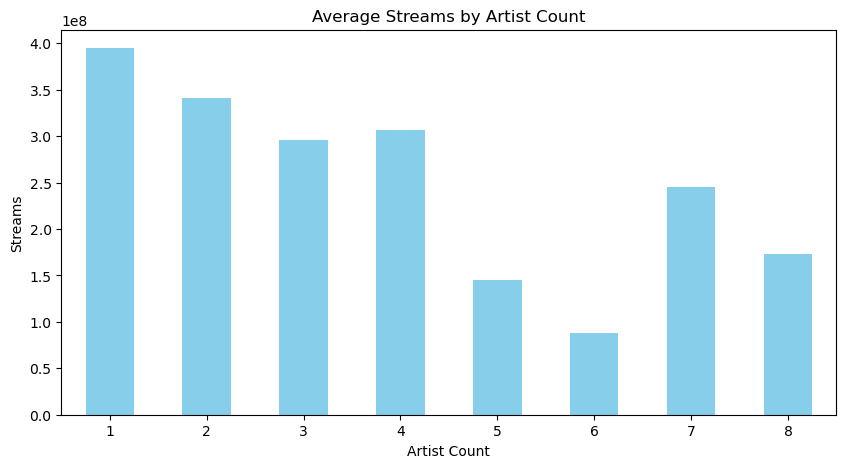

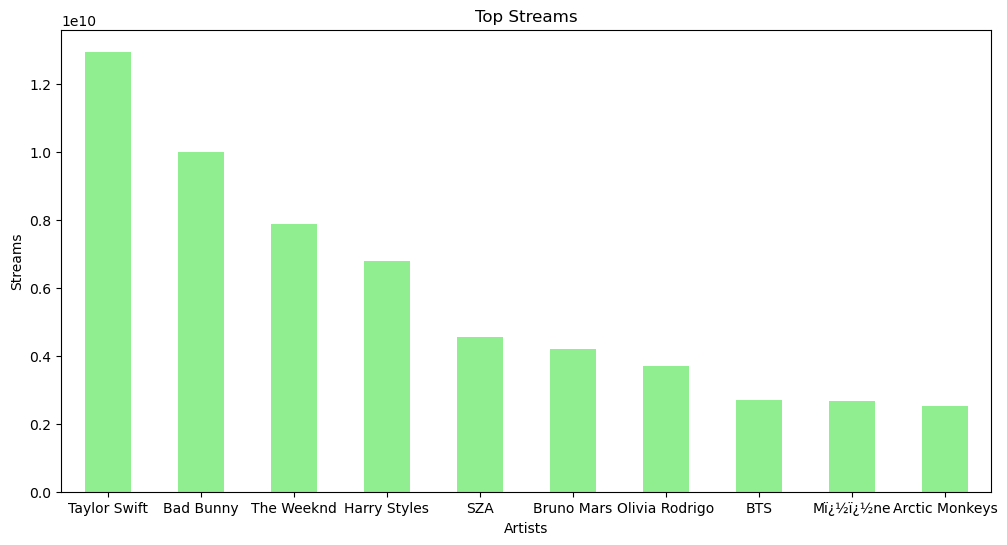

In [44]:
# Plotting average streams by artist count
plt.figure(figsize=(10, 5))
avg_streams_by_artist_count.plot(kind='bar', color='skyblue')
plt.title('Average Streams by Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.show()

# Plotting top 10 artist by total streams in 2023
plt.figure(figsize=(12, 6))
top_artists_by_streams.plot(kind='bar', color='lightgreen')
plt.title('Top Streams')
plt.xlabel('Artists')
plt.ylabel('Streams')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.show()

<h2>Temporal Trends</h2>

<h3>Identify any shifts in music attributes and preferences over time</h3>

In [6]:
# Average BPM by year
avg_bpm_by_year = df.groupby('released_year')['bpm'].mean()
print("Average BPM by year:")
print(avg_bpm_by_year)

most_common_key_by_year = df.groupby('released_year')['key'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print("Most common key by year:")
print(most_common_key_by_year)

most_common_mode_by_year = df.groupby('released_year')['mode'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print("Most common mode by year:")
print(most_common_mode_by_year)


Average BPM by year:
released_year
1930    130.000000
1942     96.000000
1946    139.000000
1950    143.000000
1952    140.000000
1957    175.000000
1958    132.500000
1959    120.500000
1963    140.000000
1968    116.000000
1970    148.000000
1971    147.000000
1973     80.000000
1979     95.000000
1982    148.000000
1983    117.000000
1984    108.000000
1985    108.000000
1986    142.500000
1996     88.000000
1997    144.000000
1998    156.000000
2000    125.000000
2004     95.500000
2005     93.000000
2007    140.000000
2010    123.200000
2011    131.200000
2012    152.400000
2013    128.000000
2014    100.428571
2015    128.857143
2016    127.545455
2017    124.923077
2018    122.428571
2019    121.653846
2020    119.033333
2021    123.352941
2022    121.984925
2023    124.364706
Name: bpm, dtype: float64
Most common key by year:
released_year
1930      F#
1942       A
1946      C#
1950       D
1952    None
1957      G#
1958       G
1959      C#
1963       D
1968    None
1970      

<h2>Cross Platform Presence</h2>

<h3>Investigate how songs perform across different streaming services</h3>

In [7]:
# Correlation between playlists on different platforms
correlation_spotify_apple = df['in_spotify_playlists'].corr(df['in_apple_playlists'])
correlation_spotify_deezer = df['in_spotify_playlists'].corr(df['in_deezer_playlists'])
correlation_apple_deezer = df['in_apple_playlists'].corr(df['in_deezer_playlists'])

print(f"Correlation between Spotify and Apple playlists: {correlation_spotify_apple}")
print(f"Correlation between Spotify and Deezer playlists: {correlation_spotify_deezer}")
print(f"Correlation between Apple and Deezer playlists: {correlation_apple_deezer}")

# Songs with the highest cross-platform presence
df['cross_platform_presence'] = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)
top_cross_platform_songs = df.nlargest(10, 'cross_platform_presence')[['track_name', 'artist(s)_name', 'cross_platform_presence']]
print("Top 10 songs with the highest cross-platform presence:")
print(top_cross_platform_songs)

Correlation between Spotify and Apple playlists: 0.692023800788707
Correlation between Spotify and Deezer playlists: 0.7742690666002591
Correlation between Apple and Deezer playlists: 0.6200453882692475
Top 10 songs with the highest cross-platform presence:
                                  track_name            artist(s)_name  \
551                                     Lost               Frank Ocean   
87                               Money Trees  Kendrick Lamar, Jay Rock   
131  Every Breath You Take - Remastered 2003                The Police   
362   Running Up That Hill (A Deal With God)                 Kate Bush   
143                             Pink + White               Frank Ocean   
91                            No Role Modelz                   J. Cole   
144                                  Circles               Post Malone   
777                                  Bound 2                Kanye West   
132                         The Night We Met                Lord Huron   
12

<h2>Export Dataframes Directly to Local Device</h2>

In [75]:
import os

# Define the path to save the file
save_path = r'path name'  # Replace with your desired folder

# Save each DataFrame to the specified path
mode_distribution.to_csv(os.path.join(save_path, 'mode_distribution.csv'), index=True)
key_distribution.to_csv(os.path.join(save_path, 'key_distribution.csv'), index=True)
avg_streams_by_artist_count.to_csv(os.path.join(save_path, 'avg_streams_by_artist_count.csv'), index=True)
top_artists_by_streams.to_csv(os.path.join(save_path, 'top_artists_by_streams.csv'), index=True)
avg_bpm_by_year.to_csv(os.path.join(save_path, 'avg_bpm_by_year.csv'), index=True)
most_common_key_by_year.to_csv(os.path.join(save_path, 'most_common_key_by_year.csv'), index=True)
most_common_mode_by_year.to_csv(os.path.join(save_path, 'most_common_mode_by_year.csv'), index=True)
top_cross_platform_songs.to_csv(os.path.join(save_path, 'top_cross_platform_songs.csv'), index=True)

# mode_distribution.to_csv('mode_distribution.csv', index=False)
# key_distribution.to_csv('key_distribution.csv', index=False)
# avg_streams_by_artist_count.to_csv('avg_streams_by_artist_count.csv', index=False)
# top_artists_by_streams.to_csv('top_artists_by_streams.csv', index=False)
# avg_bpm_by_year.to_csv('avg_bpm_by_year.csv', index=False)
# most_common_key_by_year.to_csv('most_common_key_by_year.csv', index=False)
# most_common_mode_by_year.to_csv('most_common_mode_by_year.csv', index=False)
# top_cross_platform_songs.to_csv('top_cross_platform_songs.csv', index=False)